# Project: Investigate a Dataset - [FBI Gun Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives.
Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.
The data has been supplemented with state level data from census.gov(opens in a new tab).
- The **NICS data** contains the number of firearm checks by month, state, and type.
- The **U.S. census data** contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.


### Questions for Analysis
- What census data is most associated with high gun per capita? 
- Which states have had the highest growth in gun registrations? 
- What is the overall trend of gun purchases?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

<a id='wrangling'></a>
## Data Wrangling
### General Properties


In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df_census = pd.read_csv("us_census_data.csv")
df_gun = pd.read_csv("gun_data.csv")
df_census.head()
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


From header of census data we can see columns are related to County of US part from Fact Note. so we could remove this. Lets double check with columns header.

In [3]:
df_census.info()
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [4]:
df_census.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

From the observation we could clearly see that Column 'Fact Note' is irrelevant to the other column so we will first drop this column

In [5]:
df_census = df_census.drop(columns='Fact Note')
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

Then as we can see there are 80 rows in the Fact while the other columns have 65. So we are going to delete null values in the data. Lets first observe the tail of the US census data.

In [6]:
df_census[-30:]

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
55,"All firms, 2012","374,153","68,032","499,926","231,959","3,548,449","547,352","326,693","73,418","2,100,187",...,81314,550453,"2,356,748","251,419","75,827","653,193","541,522","114,435","432,980","62,427"
56,"Men-owned firms, 2012","203,604","35,402","245,243","123,158","1,852,580","284,554","187,845","38,328","1,084,885",...,42418,302249,"1,251,696","132,163","41,270","353,012","262,650","63,112","236,252","30,039"
57,"Women-owned firms, 2012","137,630","22,141","182,425","75,962","1,320,085","194,508","106,678","23,964","807,817",...,23722,195694,"866,678","76,269","23,417","236,290","187,677","39,065","133,859","19,344"
58,"Minority-owned firms, 2012","92,219","13,688","135,313","35,982","1,619,857","85,849","56,113","14,440","926,112",...,4101,105234,"1,070,392","24,423","2,354","185,043","92,807","5,777","40,507","4,077"
59,"Nonminority-owned firms, 2012","272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782","1,121,749",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""","""12""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


Drop null entry rows

In [7]:
df_census.dropna(inplace=True)
df_gun.dropna(inplace=True)

In [8]:
df_census.isnull().sum().any()
df_gun.isnull().sum().any()

False

Now let's drop duplicated rows

In [9]:
df_census.drop_duplicates(inplace=True)
df_gun.drop_duplicates(inplace=True)

Now we are left with the rows and column we desired and we then need to splice Fact since it includes list of facts in array.

In [10]:
df_census.duplicated().sum(), df_gun.duplicated().sum()

(0, 0)

In [11]:
df_census.shape, df_gun.shape

((65, 51), (770, 27))

Month as date-time datatype

In [12]:
df_gun["month"] = pd.to_datetime(df_gun["month"])

In the census data we have list of facts so let's use explode to separate it

In [13]:
df_census['Fact'] = df_census['Fact'].apply(lambda x: x.split(",")[0])
df_census

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,Population estimates base,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,Population,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,Population,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,Persons under 5 years,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Veteran-owned firms,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,Nonveteran-owned firms,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,Population per square mile,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,Land area in square miles,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"


In [14]:
pd.options.display.max_rows=70
df_census['Fact']

0                                  Population estimates
1                             Population estimates base
2                                            Population
3                                            Population
4                                 Persons under 5 years
5                                 Persons under 5 years
6                                Persons under 18 years
7                                Persons under 18 years
8                             Persons 65 years and over
9                             Persons 65 years and over
10                                       Female persons
11                                       Female persons
12                                          White alone
13                      Black or African American alone
14              American Indian and Alaska Native alone
15                                          Asian alone
16     Native Hawaiian and Other Pacific Islander alone
17                                    Two or Mor

Transpose the census data to merge into gundata with inner join

In [15]:
Transposed_df = df_census.T
Transposed_df.columns = Transposed_df.iloc[0]
Transposed_df = Transposed_df.iloc[1:].reset_index(drop=False)
Transposed_df.rename(columns={'index':'state'}, inplace=True)
Transposed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   state                                                     50 non-null     object
 1   Population estimates                                      50 non-null     object
 2   Population estimates base                                 50 non-null     object
 3   Population                                                50 non-null     object
 4   Population                                                50 non-null     object
 5   Persons under 5 years                                     50 non-null     object
 6   Persons under 5 years                                     50 non-null     object
 7   Persons under 18 years                                    50 non-null     object
 8   Persons under 18 years          

In [16]:
cols =list(Transposed_df.columns)
cols[3] = "Population Percentage"
Transposed_df.columns = cols
Transposed_df.drop(["Female persons"], axis =1, inplace=True)

In [17]:
full_df = pd.merge(left=df_gun, right= Transposed_df, how="inner", on="state")
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 90 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   month                                                     700 non-null    datetime64[ns]
 1   state                                                     700 non-null    object        
 2   permit                                                    700 non-null    float64       
 3   permit_recheck                                            700 non-null    float64       
 4   handgun                                                   700 non-null    float64       
 5   long_gun                                                  700 non-null    float64       
 6   other                                                     700 non-null    float64       
 7   multiple                                    

Fixing the datatype to the numeric values 

In [18]:
full_df_numeric = full_df.copy()

# Loop over columns by POSITION, starting from index 2
for i in range(2, full_df_numeric.shape[1]):
    s = (
        full_df_numeric.iloc[:, i]
        .astype(str)
        .replace(r'[,%$]', '', regex=True)  # remove , % $
        .replace('', np.nan)
    )
    full_df_numeric.iloc[:, i] = pd.to_numeric(s, errors='coerce')

In [19]:
full_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 90 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   month                                                     700 non-null    datetime64[ns]
 1   state                                                     700 non-null    object        
 2   permit                                                    700 non-null    float64       
 3   permit_recheck                                            700 non-null    float64       
 4   handgun                                                   700 non-null    float64       
 5   long_gun                                                  700 non-null    float64       
 6   other                                                     700 non-null    float64       
 7   multiple                                    

instead of space lets replace it with '_'

In [20]:
full_df_numeric.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
full_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 90 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   month                                                     700 non-null    datetime64[ns]
 1   state                                                     700 non-null    object        
 2   permit                                                    700 non-null    float64       
 3   permit_recheck                                            700 non-null    float64       
 4   handgun                                                   700 non-null    float64       
 5   long_gun                                                  700 non-null    float64       
 6   other                                                     700 non-null    float64       
 7   multiple                                    

irrelevant dropping irrelevant column 'fips_code' 

In [21]:
full_df_numeric.drop(columns='fips_code',inplace=True)

In [22]:
full_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 89 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   month                                                     700 non-null    datetime64[ns]
 1   state                                                     700 non-null    object        
 2   permit                                                    700 non-null    float64       
 3   permit_recheck                                            700 non-null    float64       
 4   handgun                                                   700 non-null    float64       
 5   long_gun                                                  700 non-null    float64       
 6   other                                                     700 non-null    float64       
 7   multiple                                    

In [23]:
# Ensure month is datetime
full_df_numeric["month"] = pd.to_datetime(full_df_numeric["month"])

# Extract year
full_df_numeric["year"] = full_df_numeric["month"].dt.year

# Aggregate by state-year
gun_state_year = (full_df_numeric
                  .groupby(["state", "year"])
                  .agg(
                      total_handgun=("handgun", "sum"),
                      total_long_gun=("long_gun", "sum"),
                      total_permit=("permit", "sum"),
                      total_checks=("totals", "sum")  # NICS total
                  )
                  .reset_index())

gun_state_year

,state,year,total_handgun,total_long_gun,total_permit,total_checks
0,Alabama,2016,47072.0,56111.0,117604.0,239533
1,Alabama,2017,68785.0,51771.0,187155.0,336763
2,Alaska,2016,16768.0,18276.0,1333.0,40744
3,Alaska,2017,24596.0,22411.0,2140.0,56902
4,Arizona,2016,69117.0,52713.0,42763.0,185555
...,...,...,...,...,...,...
95,West Virginia,2017,56601.0,46918.0,19079.0,152784
96,Wisconsin,2016,77650.0,78918.0,135402.0,298975
97,Wisconsin,2017,129794.0,108022.0,137868.0,387537
98,Wyoming,2016,9588.0,12268.0,2969.0,27983


In [24]:
gun_state_total = (gun_state_year
                   .groupby("state")
                   .agg(
                       total_handgun=("total_handgun", "sum"),
                       total_long_gun=("total_long_gun", "sum"),
                       total_permit=("total_permit", "sum"),
                       total_checks=("total_checks", "sum")
                   )
                   .reset_index())

gun_state_total.head()

,state,total_handgun,total_long_gun,total_permit,total_checks
0,Alabama,115857.0,107882.0,304759.0,576296
1,Alaska,41364.0,40687.0,3473.0,97646
2,Arizona,180696.0,120744.0,106300.0,465108
3,Arkansas,83550.0,90593.0,48991.0,281748
4,California,629186.0,537912.0,845205.0,2206543


<a id='eda'></a>
## Exploratory Data Analysis

In this section, I explore the main patterns in the gun and census data to understand how background checks vary across states.

### What census data is most associated with high gun per capita?

In [25]:
def set_plot_labels(title, xlabel, ylabel):
    """Add a consistent title and axis labels to plots."""
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [26]:
def extract_fact_row(df, fact_name):
    """
    From the census dataframe, extract one 'Fact' row and return a Series
    indexed by state name with numeric values.
    """
    row = df.loc[df["Fact"] == fact_name].iloc[0]
    # Drop non-state columns if present
    cols_to_drop = [c for c in ["Fact", "Fact Note"] if c in row.index]
    row = row.drop(labels=cols_to_drop)
    
    # Remove commas and convert to numeric
    row = row.replace(",", "", regex=True)
    row = pd.to_numeric(row, errors="coerce")
    return row

In [34]:
df = full_df_numeric.loc[:, ~full_df_numeric.columns.duplicated()]
df["guns_per_100k"] = df["totals"] / (df["population"] / 100000)

/var/folders/mx/13txkwqx4gl2j96pycd99rwc0000gn/T/ipykernel_35739/1880341219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["guns_per_100k"] = df["totals"] / (df["population"] / 100000)


In [45]:
start_idx = df.columns.get_loc("population_estimates")
census_cols = df.columns[start_idx:]  # all columns from population_estimates onward

census_cols[:10]  # quick check of first ones
# guns per capita per state (average over time)
gun_state = df.groupby("state").agg(
    guns_per_100k=("guns_per_100k", "mean")
)

# Make sure census_state does NOT carry a guns_per_100k column
census_state = census_state.drop(columns=["guns_per_100k"], errors="ignore")

# Now join — no overlapping column names
state_level = gun_state.join(census_state, how="inner")

state_level.head()

,guns_per_100k,population_estimates,population_estimates_base,population_percentage,population,persons_under_5_years,persons_under_18_years,persons_65_years_and_over,white_alone,black_or_african_american_alone,...,all_firms,men-owned_firms,women-owned_firms,minority-owned_firms,nonminority-owned_firms,veteran-owned_firms,nonveteran-owned_firms,population_per_square_mile,land_area_in_square_miles,year
state,,,,,,,,,,,,,,,,,,,,,
Alabama,861.219113,4863300,4780131,1.7,4779736,6.0,22.6,16.1,69.3,26.8,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,2017
Alaska,982.034618,741894,710249,4.5,710231,7.3,25.2,10.4,66.1,3.8,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,2017
Arizona,519.742047,6931071,6392301,8.4,6392017,6.3,23.5,16.9,83.3,4.9,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08,2017
Arkansas,690.172259,2988248,2916025,2.5,2915918,6.4,23.6,16.3,79.4,15.7,...,231959,123158,75962,35982,189029,25915,192988,56.0,52035.48,2017
California,423.069739,39250017,37254522,5.4,37253956,6.3,23.2,13.6,72.7,6.5,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22,2017


In [38]:
# Select numeric columns only
numeric_state = state_level.select_dtypes(include=[np.number])

# Correlation of every numeric variable with guns_per_100k
corr_with_guns = numeric_state.corr()["guns_per_100k"].sort_values(ascending=False)

corr_with_guns   # strongest positive associations

guns_per_100k                                               1.000000
with_a_disability                                           0.228648
persons_in_poverty                                          0.200181
white_alone                                                 0.138409
owner-occupied_housing_unit_rate                            0.092262
persons_under_5_years                                       0.081076
persons_under_18_years                                      0.080307
living_in_same_house_1_year_ago                             0.073431
persons_65_years_and_over                                   0.070540
high_school_graduate_or_higher                              0.061997
in_civilian_labor_force                                     0.048984
land_area_in_square_miles                                   0.013750
american_indian_and_alaska_native_alone                     0.008369
total_manufacturers_shipments                              -0.008794
persons__without_health_insurance 

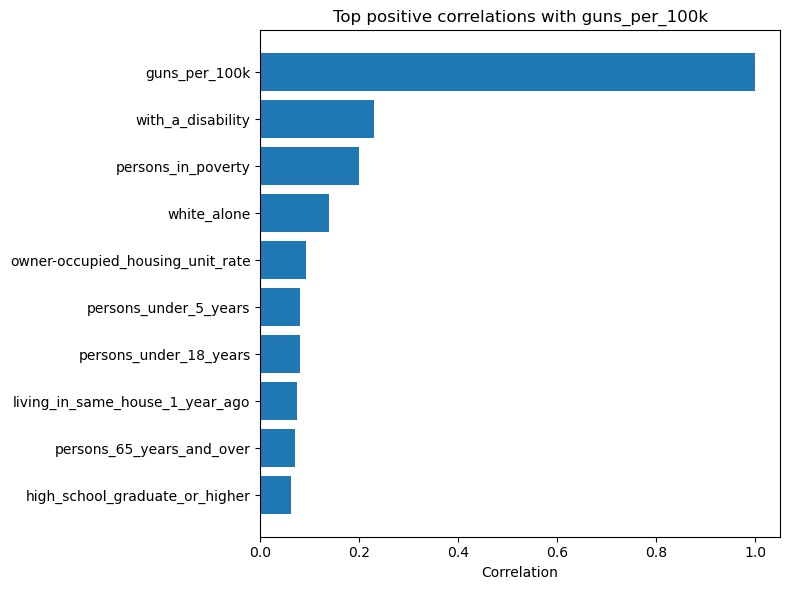

In [39]:
# Pick how many you want to show
top_n = 10
top_pos = corr_with_guns.head(top_n)

plt.figure(figsize=(8, 6))
plt.barh(top_pos.index, top_pos.values)
plt.gca().invert_yaxis()  # so the highest is on top
plt.title("Top positive correlations with guns_per_100k")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()


## Association between gun checks per capita and census characteristics
I computed Pearson correlations between guns per 100,000 people (guns_per_100k) and a wide range of state-level census variables. The correlations are fairly modest in size, so they indicate general tendencies rather than strong relationships, but there are some clear patterns.

### Variables most positively associated with guns per capita
The census variables with the strongest positive correlations with guns_per_100k are:
- With a disability (with_a_disability, r ≈ 0.23)
- Persons in poverty (persons_in_poverty, r ≈ 0.20)
- White alone (white_alone, r ≈ 0.14)
- Owner-occupied housing unit rate (owner-occupied_housing_unit_rate, r ≈ 0.09)
- Share of children and older people (persons_under_5_years, persons_under_18_years, persons_65_years_and_over, r ≈ 0.07–0.08)
These results suggest that states with higher per-capita gun checks tend to have:
- A higher share of residents with disabilities
- Higher poverty rates
- A larger white population share
- Slightly higher owner-occupation rates and somewhat more children and older adults
However, the magnitudes (around 0.2 or below) are relatively small, so these are weak to moderate associations.

### Variables most negatively associated with guns per capita
The strongest negative correlations with guns_per_100k are:

####  Housing costs and rents
- Median gross rent (median_gross_rent, r ≈ −0.30)
- Median selected monthly owner costs with a mortgage (…with_a_mortgage, r ≈ −0.28)
- Median household income (median_household_income_(in_2015_dollars), r ≈ −0.25)
- Median selected monthly owner costs without a mortgage (…without_a_mortgage, r ≈ −0.24)
- Median value of owner-occupied housing units (median_value_of_owner-occupied_housing_units, r ≈ −0.24)

#### Income and economic affluence
- Per capita income (per_capita_income_in_past_12_months_(in_2015_dollars), r ≈ −0.24)
- Urbanisation and diversity proxies
- Population per square mile (population_per_square_mile, r ≈ −0.19)
- Foreign born (foreign_born_persons, r ≈ −0.18)
- Language other than English at home (language_other_than_english_spoken_at_home, r ≈ −0.17)
- Asian alone (asian_alone, r ≈ −0.16)
- Hispanic or Latino (hispanic_or_latino, r ≈ −0.14)
Taken together, these patterns indicate that states with higher per-capita gun checks tend to be:
- Less affluent, with lower incomes and lower housing costs
- Less urban and less densely populated
- Less diverse, with fewer foreign-born and non-English-speaking residents
Conversely, wealthier, high-cost, denser and more diverse states tend to have lower levels of guns_per_100k.

### Interpretation and limitations
These results are associational and based on correlations across a relatively small number of units (50 states). Some points to highlight:
- Correlation values are generally below 0.3 in magnitude, so the relationships are not very strong.
- NICS background checks are a proxy for gun purchases, not a direct count of firearms.
- Many of these census variables are themselves correlated with each other (for example, income, rent and population density), so we cannot say which factor is independently most important.
- The analysis is cross-sectional (one snapshot per state), so it does not tell us how changes over time within a state relate to changes in gun checks.
Therefore, we can say that certain socio-economic and demographic characteristics tend to be associated with higher or lower gun checks per capita, but we cannot infer causality from these correlations alone.

### Which states have had the highest growth in gun registrations?

In [40]:
# Check year range
gun_state_year["year"].min(), gun_state_year["year"].max()

(2016, 2017)

In [41]:
year_start = 2016
year_end = 2017

start = gun_state_year[gun_state_year["year"] == year_start][["state", "total_checks"]]
end = gun_state_year[gun_state_year["year"] == year_end][["state", "total_checks"]]

start = start.rename(columns={"total_checks": "checks_start"})
end = end.rename(columns={"total_checks": "checks_end"})

growth_df = pd.merge(start, end, on="state", how="inner")

# Avoid division by zero
growth_df = growth_df[growth_df["checks_start"] > 0].copy()

# Absolute and relative growth
growth_df["abs_growth"] = growth_df["checks_end"] - growth_df["checks_start"]
growth_df["rel_growth"] = growth_df["abs_growth"] / growth_df["checks_start"]

# Sort by relative growth
top_rel_growth = growth_df.sort_values("rel_growth", ascending=False).head(10)
top_abs_growth = growth_df.sort_values("abs_growth", ascending=False).head(10)

print("Top 10 states by relative growth (2016 -> 2017):")
display(top_rel_growth[["state", "checks_start", "checks_end", "abs_growth", "rel_growth"]])

print("\nTop 10 states by absolute growth (2016 -> 2017):")
display(top_abs_growth[["state", "checks_start", "checks_end", "abs_growth", "rel_growth"]])

Top 10 states by relative growth (2016 -> 2017):


,state,checks_start,checks_end,abs_growth,rel_growth
16,Kentucky,1434975,3417976,1983001,1.381906
11,Idaho,69405,131447,62042,0.893913
22,Minnesota,303783,529302,225519,0.742369
41,Tennessee,315775,549639,233864,0.740603
39,South Carolina,174912,295532,120620,0.689604
43,Utah,120844,199279,78435,0.649060
36,Oregon,147655,240741,93086,0.630429
20,Massachusetts,96542,154161,57619,0.596828
30,New Mexico,69931,111491,41560,0.594300
44,Vermont,17103,27148,10045,0.587324



Top 10 states by absolute growth (2016 -> 2017):


,state,checks_start,checks_end,abs_growth,rel_growth
16,Kentucky,1434975,3417976,1983001,1.381906
12,Illinois,782393,1163945,381552,0.487673
42,Texas,734860,1074971,340111,0.462824
8,Florida,608567,912765,304198,0.499860
37,Pennsylvania,506462,763378,256916,0.507276
41,Tennessee,315775,549639,233864,0.740603
22,Minnesota,303783,529302,225519,0.742369
13,Indiana,403314,606881,203567,0.504736
34,Ohio,370216,540654,170438,0.460374
46,Washington,268682,419522,150840,0.561407


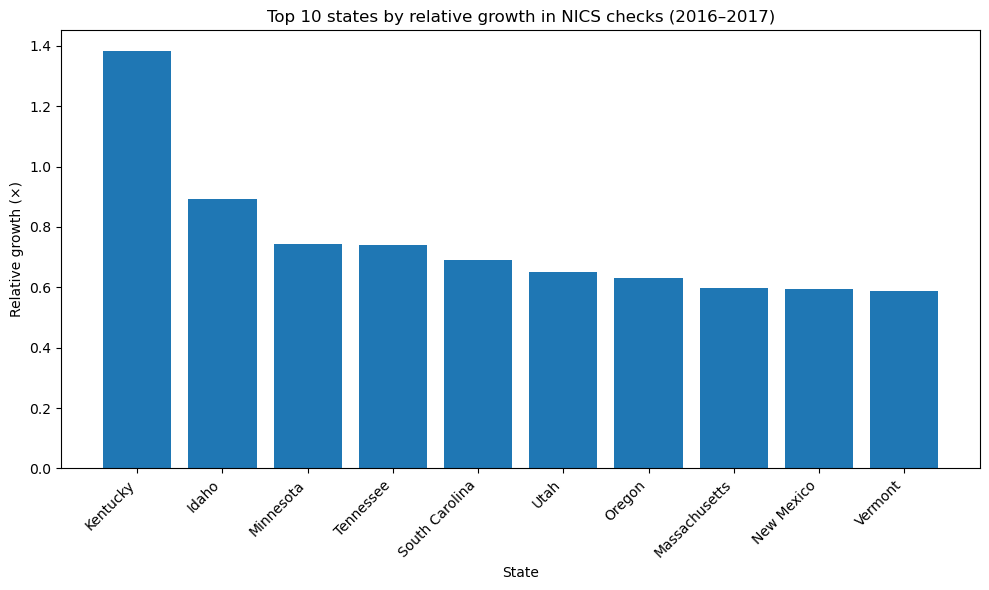

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(top_rel_growth["state"], top_rel_growth["rel_growth"])
plt.xticks(rotation=45, ha="right")
set_plot_labels("Top 10 states by relative growth in NICS checks (2016–2017)",
                "State",
                "Relative growth (×)")
plt.tight_layout()
plt.show()

## State-Level Growth in Gun Background Checks (2016–2017)

Looking at changes between 2016 and 2017, there are clear differences in how strongly gun background checks grew across states.

### States with the fastest relative growth

When we look at relative growth (percentage increase), the top states are:

- Kentucky: checks rose from 1,434,975 to 3,417,976, an increase of about 1.38× (or 138% growth).

- Idaho, Minnesota, and Tennessee also show very strong increases, with relative growth around 74–89%.

- Other states with large proportional increases include South Carolina, Utah, Oregon, Massachusetts, New Mexico, and Vermont, all with growth of roughly 59–69%.

These states experienced the largest proportional changes in checks year-on-year, indicating that demand for background checks increased especially quickly there between 2016 and 2017.

### States with the largest absolute growth

If we focus instead on absolute growth (the raw increase in the number of checks), a slightly different picture emerges:

- Kentucky again stands out, with an increase of 1,983,001 checks, by far the largest jump in the country.

- Illinois, Texas, and Florida also show large absolute increases, each adding roughly 300,000–380,000 extra checks between 2016 and 2017.

- Pennsylvania, Tennessee, Minnesota, Indiana, Ohio, and Washington also feature among the top ten in absolute growth.

These states already had substantial volumes of checks in 2016, so even moderate percentage increases translate into very large absolute changes.

### Interpretation and limitations

Overall, Kentucky is an outlier: it ranks first in both relative and absolute growth, suggesting a particularly sharp increase in background check activity between 2016 and 2017. Other states like Minnesota and Tennessee also appear in both top-10 lists, indicating strong growth both proportionally and in raw numbers.

However, these results should be interpreted with care:

- NICS background checks are only a proxy for gun purchases; a single transaction can involve multiple firearms, and some checks may not result in a purchase.

- The analysis covers a single one-year change (2016 → 2017). We cannot tell from this alone whether these increases are part of a longer-term trend or just a short-term spike.

- We do not control for other state-level factors (e.g. policy changes, economic conditions, or population changes) that might help explain why some states experienced stronger growth than others.

So, the results show where growth in background checks was concentrated in this particular year, but they do not by themselves explain why these changes occurred.

### What is the overall trend of gun purchases?

In [43]:
us_yearly = (gun_state_year
             .groupby("year")
             .agg(total_checks=("total_checks", "sum"))
             .reset_index())

us_yearly

,year,total_checks
0,2016,11455454
1,2017,17974940


In [44]:
min_year, max_year = us_yearly["year"].min(), us_yearly["year"].max()
start_checks = us_yearly.loc[us_yearly["year"] == min_year, "total_checks"].iloc[0]
end_checks = us_yearly.loc[us_yearly["year"] == max_year, "total_checks"].iloc[0]

print(f"Year range: {min_year}–{max_year}")
print(f"Total checks in {min_year}: {start_checks:,}")
print(f"Total checks in {max_year}: {end_checks:,}")
print(f"Percentage change: {(end_checks - start_checks) / start_checks * 100:.1f}%")

Year range: 2016–2017
Total checks in 2016: 11,455,454
Total checks in 2017: 17,974,940
Percentage change: 56.9%


### Overall Trend in Gun Background Checks (2016–2017)

Using the aggregated NICS data, the total number of background checks increased from 11,455,454 in 2016 to 17,974,940 in 2017. This corresponds to a 56.9% increase in checks over just one year.

This is a substantial short-term rise, suggesting that demand for firearms (or at least the number of background checks processed) grew sharply between 2016 and 2017. However, because this comparison only covers two consecutive years, we cannot tell whether this change is part of a longer-term upward trend, a temporary spike, or a correction after an unusually low or high year.

<a id='conclusions'></a>
## Conclusions

Gun background checks rose sharply between 2016 and 2017, increasing by 56.9 per cent nationwide. This indicates a noticeable rise in demand for background checks during this period, although using only two years of data means we cannot confirm whether this is part of a longer trend.
Growth varied widely across states. Kentucky showed the largest increase in both relative and absolute terms, while states such as Idaho, Minnesota and Tennessee also recorded strong year-on-year rises. These differences highlight that changes in background check activity are not uniform across the country.
When comparing gun checks per capita with census characteristics, a few clear patterns appear. Higher per-capita gun checks tend to occur in states with higher disability rates, higher poverty levels, and a larger white population share. In contrast, states with higher incomes, higher housing costs, greater population density, and more diverse populations tend to have lower checks per capita. These relationships are fairly modest in size, so they should be interpreted as associations rather than causes.

### Limitations

- NICS checks are a proxy, not a direct count of firearms purchased.
- The analysis is based on state-level correlations, which do not imply causation.
- The growth analysis uses only one year of change (2016 to 2017).

Overall, the data shows strong year-to-year growth in background checks and highlights demographic and economic differences between states with higher and lower gun-check rates.

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Gun_data_analysis_KK.ipynb